In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Teoria

Transformacje morfologiczne to kilka prostych operacji opartych na kształcie obrazu. 

Jest ona zazwyczaj wykonywana na obrazach binarnych. Wymaga dwóch wejść, jedno jest naszym oryginalnym obrazem, drugie nazywane jest elementem strukturyzującym lub jądrem, które decyduje o charakterze operacji. 

Dwa podstawowe operatory morfologiczne to Erozja i Rozszerzenie. Wówczas w grę wchodzi również jego wariant formy, jak otwieranie, zamykanie, gradient itp. Zobaczymy je pojedynczo za pomocą następującego obrazu:

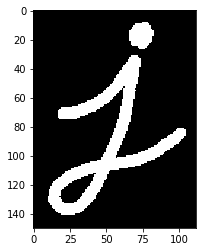

In [2]:
image = cv2.imread('images/morpho.png')
plt.imshow(image)

## 1. Erozja

Podstawowa idea erozji jest taka sama jak erozja gleby, eroduje granice obiektu na pierwszym planie (zawsze staraj się zachować pierwszy plan w kolorze białym). Więc co to robi? Jądro przesuwa się przez obraz (jak w konwolucji 2D). Pixel w oryginalnym obrazie (albo 1 albo 0) będzie uważany za 1 tylko wtedy, gdy wszystkie piksele pod jądrem są 1, w przeciwnym razie jest on erodowany (wykonany do zera).

Więc co się dzieje, to fakt, że wszystkie piksele w pobliżu granicy zostaną odrzucone w zależności od wielkości jądra. Tak więc grubość lub rozmiar obiektu na pierwszym planie zmniejsza się lub po prostu biały obszar zmniejsza się w obrazie. Jest to przydatne do usuwania małych białych szumów.

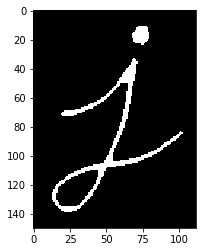

In [4]:
img = cv2.imread('images/morpho.png', 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
plt.imshow(erosion, cmap='gray')

## 2. Rozszerzanie

To przeciwieństwo erozji. Tutaj element pikselowy to '1', jeśli co najmniej jeden piksel pod jądrem to '1'. W ten sposób zwiększa się obszar bieli na obrazie lub zwiększa się rozmiar pierwszego planu. Zazwyczaj, w takich przypadkach jak usuwanie hałasu, po erozji następuje rozszerzenie. Ponieważ erozja usuwa białe szumy, ale także kurczy nasz obiekt. Tak więc rozszerzamy go. Ponieważ hałas zniknął, nie wróci one już do nas, ale powierzchnia naszego obiektu wzrasta.

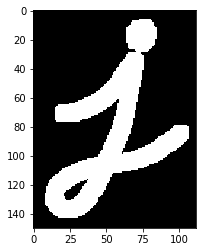

In [8]:
img = cv2.imread('images/morpho.png', 0)
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')


## Erozja i rozszerzanie na jednym obrazie

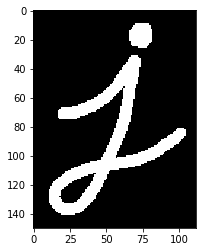

In [9]:
img = cv2.imread('images/morpho.png', 0)
kernel = np.ones((5, 5), np.uint8)
image = cv2.erode(img, kernel, iterations = 1)
image = cv2.dilate(image, kernel, iterations = 1)
plt.imshow(image, cmap='gray')